In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tracks_df = pd.read_csv('cleaned_data/tracks_new.csv', index_col='Unnamed: 0')
users_df = pd.read_csv('cleaned_data/users_new.csv', index_col='Unnamed: 0')

Câu 1: Trong file "tracks_new.csv": 
- Tìm tổng số lượt likes_count, playback_count của các 'genre' và lưu vào dataFrame
- Sắp xếp dataFrame này theo thứ tự tăng dần likes_count
- Vẽ 2 biểu đồ thể hiện
- Mục đích: tìm được thể loại có tổng số lượt likes_count cao nhất và playback_count cao nhất

In [57]:
genres = tracks_df['genre'].unique()
#create genre df:
genre_df = pd.DataFrame(columns = ['sum_likes_count', 'sum_playback_count'], index = genres)

for g in genres:
    genre_df.loc[g,'sum_likes_count']=tracks_df[tracks_df['genre']==g]['likes_count'].sum()
    genre_df.loc[g,'sum_playback_count']=tracks_df[tracks_df['genre']==g]['playback_count'].sum()
    
genre_df.sort_values(by='sum_likes_count', ascending=False, inplace=True)

Xem kết quả của 10 dòng đầu

In [58]:
genre_df.head(10)

,sum_likes_count,sum_playback_count
Electronic,2550977.0,165270409.0
Indie,1791551.0,140774857.0
russ,1016850.0,70141840.0
Jazz & Blues,795824.0,47363084.0
Folk,739395.0,35819052.0
wiz khalifa,635977.0,41964962.0
Rock,600719.0,52365698.0
Hip Hop,585424.0,35667370.0
Dance & EDM,490538.0,24802890.0
Alternative,481036.0,31872256.0


Vẽ biểu đồ của 10 dòng đầu có sum_likes_count cao nhất:

<AxesSubplot:>

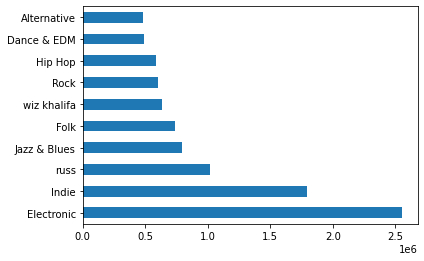

In [34]:
genre_df['sum_likes_count'].head(10).plot.barh()

In [ ]:
genre_df['sum_playback_count'].head(10).plot.barh()

Vẽ biểu đồ của 10 dòng đầu có sum_playback_count cao nhất:

<AxesSubplot:>

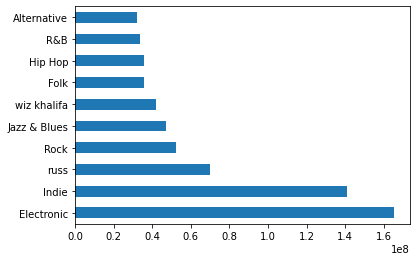

In [33]:
genre_df.sort_values(by='sum_playback_count',ascending=False)['sum_playback_count'].head(10).plot.barh()

Câu 2: Trong "users_new.csv":
- Cột "country_code" thể hiện user này đến từ nước nào
- Tạo ra một DataFrame để lưu lại các thông tin sau: Index = "country_code", 1 cột number_of_users lưu số lượng user.
- Không xử lí ô trống
- Tìm hiểu users trong file này đến từ nước nào nhiều nhất, sắp xếp theo thứ tự giảm dần

In [59]:
#country_code viết tắt là cc
cc = users_df[users_df['country_code'].notna()]['country_code'].unique()
#create df
cc_df = pd.DataFrame(columns=['number_of_users'],index=cc)

for c in cc:
    cc_df.loc[c,'number_of_users'] = (users_df['country_code']==c).sum()
    
cc_df.sort_values(by='number_of_users',ascending=False,inplace=True)

Xem kết quả:

In [60]:
cc_df

,number_of_users
US,34
VN,18
AU,12
GB,11
CA,10
KR,5
JM,3
IN,3
BR,3
NL,3


vẽ biểu đồ của 20 dòng đầu tiên

<AxesSubplot:>

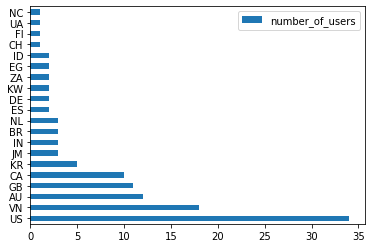

In [63]:
cc_df.head(20).plot.barh()

Nhận xét: Mã US có số lượng users nhiều nhất (nhiều khoảng gấp đôi vị trí thứ hai là VN)